In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install scikit-plot

In [3]:
from scikitplot.metrics import plot_roc

In [4]:
def plot_roc_curve(fp_r, tp_r):
    roc_auc = auc(fp_r, tp_r)
    plt.plot(fp_r, tp_r, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()0

def plot_model(m, X, y, three=True):
  y_pred = []
  y_prob = []
  for i in range(len(y)):
    X_test = X[i, :].reshape(1, -1)
    X_train = np.delete(X, i, axis=0)
    y_test = y[i]
    y_train = np.delete(y, i)
    m.fit(X_train, y_train)
    y_pred.append(m.predict(X_test))
    y_prob.append(m.predict_proba(X_test))
  y_prob = np.squeeze(y_prob)
  y_pred = np.squeeze(y_pred)
  print('Accuracy score: ' + str(accuracy_score(y, y_pred)))
  heatmap(confusion_matrix(y, y_pred), annot=True, fmt= 'd', cmap=plt.cm.Blues)
  plt.show()
  heatmap(confusion_matrix(y, y_pred, normalize='true'), annot=True, cmap=plt.cm.Blues)
  plt.show()
  plot_roc(y, y_prob)
  plt.show()


In [5]:
import os
import pandas as pd

root = './gdrive/My Drive/thesis'
df = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
result = pd.read_csv(os.path.join(root, 'miei_result.csv'), header=0, index_col=0)
df = df.loc[result.index.values]

df[df.columns[-1]].value_counts()

MCI        130
DEMENZA     62
NORMALI     30
MCI          1
Name: DGN1, dtype: int64

In [6]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2

X = df.iloc[:, 3:-1].to_numpy()
print(X.shape)
X_s = StandardScaler().fit_transform(X)
y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)


(223, 18)
[1 1 2 2 0 2 2 2 2 1 1 1 1 1 0 1 0 0 1 1 1 2 1 1 2 1 1 2 1 0 2 2 2 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 2 1 2 2 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 2 1 2 1 1 1 0 1 0
 1 2 1 1 0 0 1 1 0 1 2 0 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1
 0 2 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1
 1 1 2 1 2 2 1 1 2 0 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1
 0]


Fitting 223 folds for each of 90 candidates, totalling 20070 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 6592 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9688 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 12608 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 15516 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 16706 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 19848 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 20067 out of 20070 | elapsed:  8.3min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 20070 out of 20070 | elapsed:  8.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 223 folds for each of 30 candidates, totalling 6690 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 6690 out of 6690 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 223 folds for each of 150 candidates, totalling 33450 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 14300 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 19500 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 25500 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 32300 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 33450 out of 33450 | elapsed:  7.1min finished


LOOCV score = 0.6412556053811659
Accuracy score: 0.6412556053811659


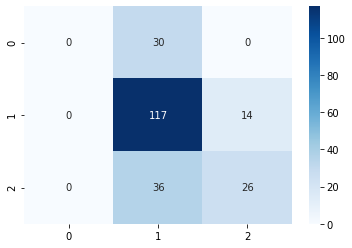

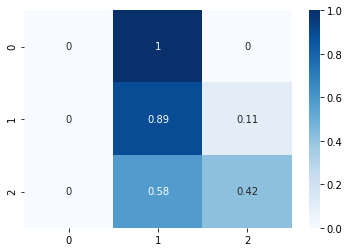

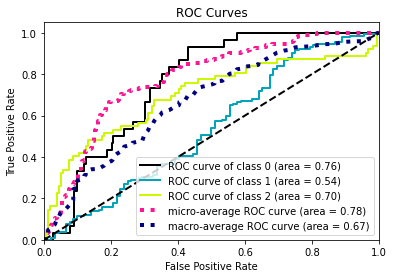

LOOCV score = 0.6367713004484304
Accuracy score: 0.6367713004484304


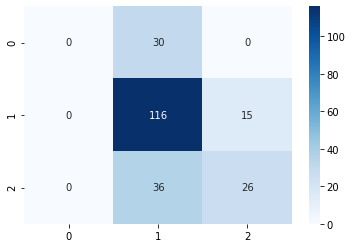

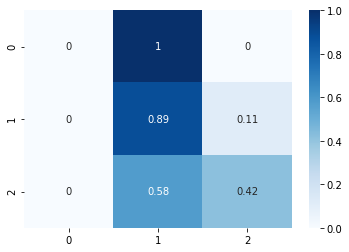

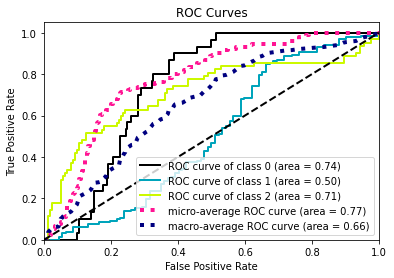

LOOCV score = 0.6412556053811659
Accuracy score: 0.6412556053811659


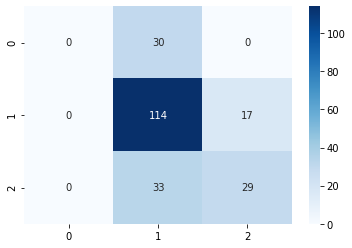

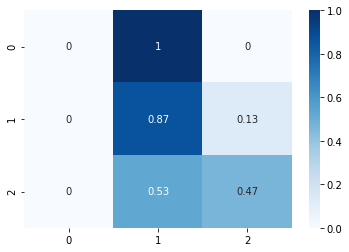

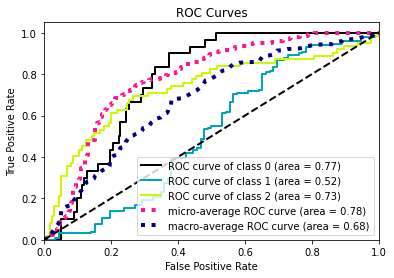

In [7]:
#3 classi SVM gridSearch A
from seaborn import heatmap
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_curve, auc, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.475 (0.499)
Accuracy score: 0.47533632286995514


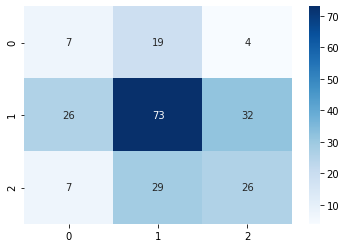

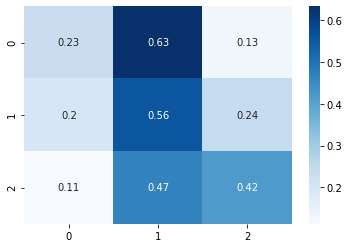

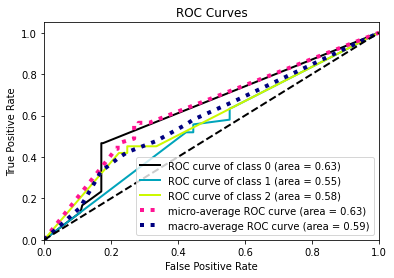

In [8]:
#3 classi decision - tree A

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

Fitting 223 folds for each of 90 candidates, totalling 20070 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 12998 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 15616 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 18850 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 20070 out of 20070 | elapsed:  8.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 223 folds for each of 30 candidates, totalling 6690 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6690 out of 6690 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 223 folds for each of 150 candidates, totalling 33450 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 7164 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 9764 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 12764 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 16636 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 24236 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 32636 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 33450 out of 33450 | elapsed: 10.6min finished


LOOCV score = 0.6053811659192825
Accuracy score: 0.6053811659192825


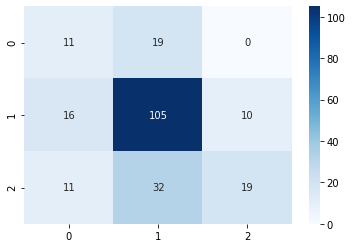

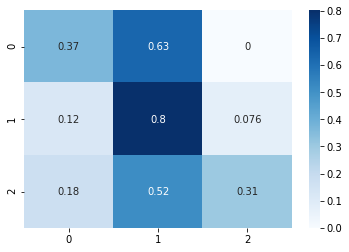

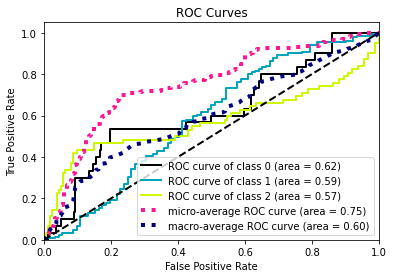

LOOCV score = 0.6367713004484304
Accuracy score: 0.6367713004484304


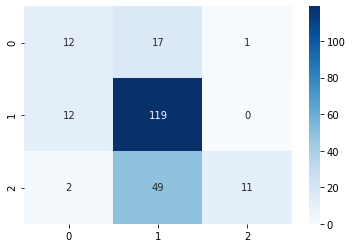

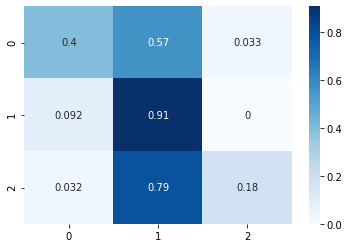

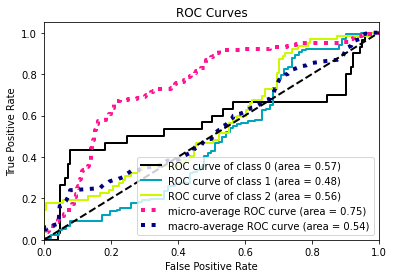

LOOCV score = 0.5874439461883408
Accuracy score: 0.5874439461883408


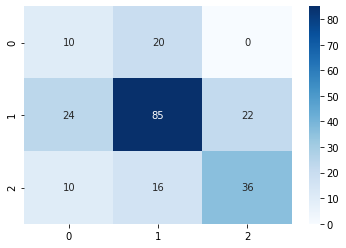

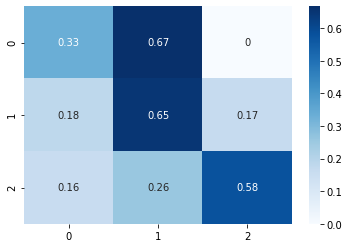

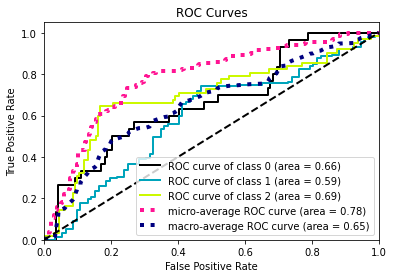

In [9]:
#3 classi SVM gridSearch Aw
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.489 (0.500)
Accuracy score: 0.48878923766816146


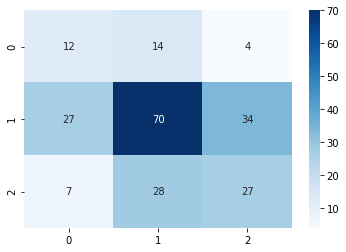

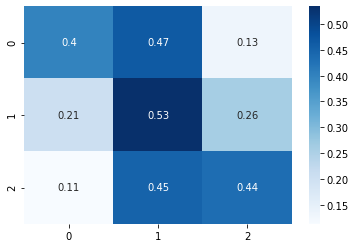

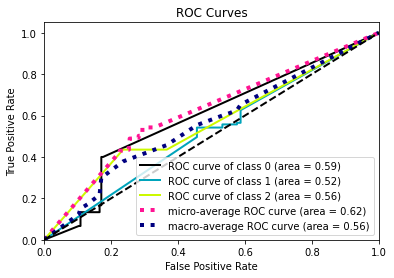

In [10]:
#3 classi decision - tree Aw
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(class_weight='balanced', random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

In [11]:
idx_2 = [y_3 != 2]
X_2 = X[idx_2]
X_2_s = StandardScaler().fit_transform(X_2)
y_2 = y_3[idx_2]
print(np.bincount(y_2))

[ 30 131]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [12]:
X_2.shape

(161, 18)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 161 folds for each of 90 candidates, totalling 14490 fits


[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 11972 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 14490 out of 14490 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 161 folds for each of 30 candidates, totalling 4830 fits


[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4830 out of 4830 | elapsed:   26.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 161 folds for each of 150 candidates, totalling 24150 fits


[Parallel(n_jobs=-1)]: Done 732 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5532 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 13532 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 24143 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 24150 out of 24150 | elapsed:  1.7min finished


LOOCV score = 0.8136645962732919
Accuracy score: 0.8136645962732919


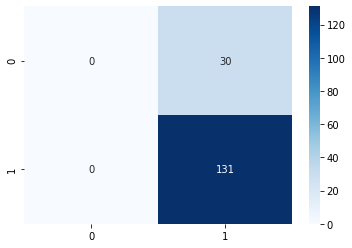

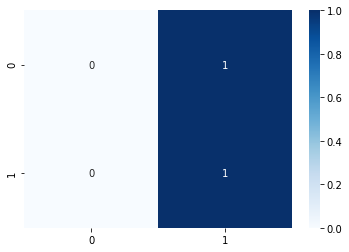

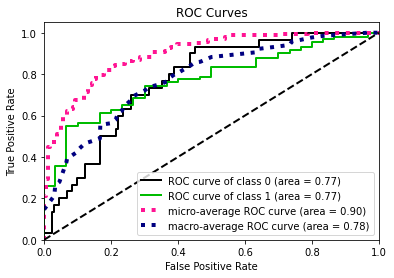

LOOCV score = 0.8136645962732919
Accuracy score: 0.8136645962732919


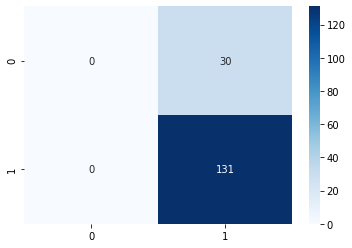

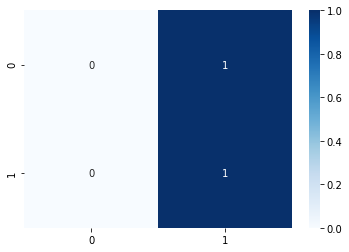

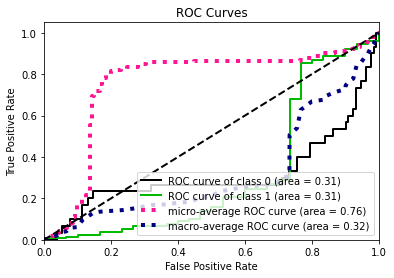

LOOCV score = 0.8198757763975155
Accuracy score: 0.8198757763975155


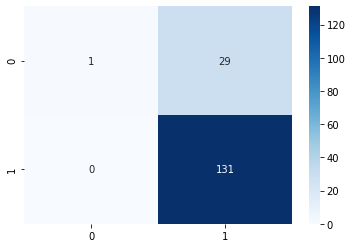

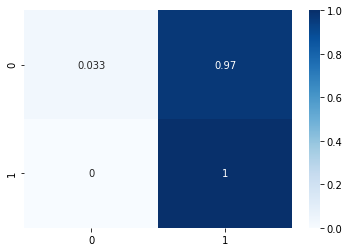

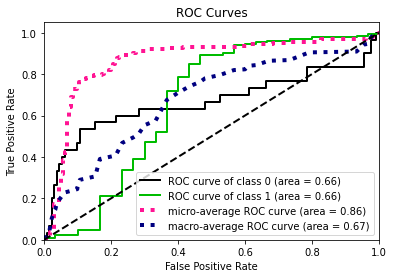

In [13]:
#2 classi SVM gridSearch A
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_2_s, y_2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_2_s, y_2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_2_s, y_2)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_2_s, y_2, False)

Accuracy: 0.714 (0.452)
Accuracy score: 0.7142857142857143


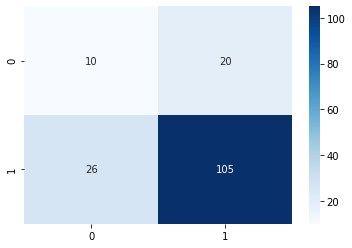

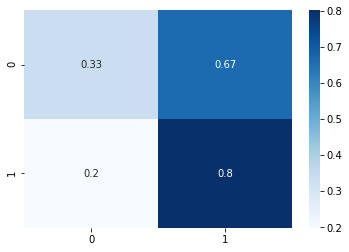

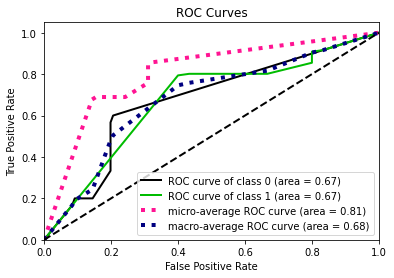

In [14]:
#2 classi decision - tree A
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X_2, y_2, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X_2, y_2, False)

Fitting 161 folds for each of 90 candidates, totalling 14490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 484 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2884 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 6884 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 12008 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 14487 out of 14490 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 14490 out of 14490 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 161 folds for each of 30 candidates, totalling 4830 fits


[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 4830 out of 4830 | elapsed:   32.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 161 folds for each of 150 candidates, totalling 24150 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 10860 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 19660 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 24150 out of 24150 | elapsed:  3.0min finished


LOOCV score = 1.0
Accuracy score: 1.0


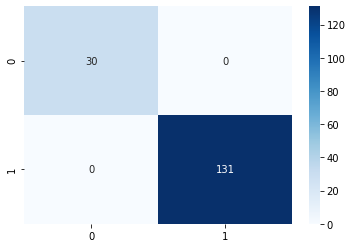

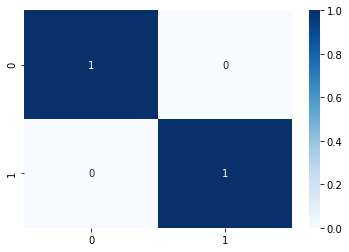

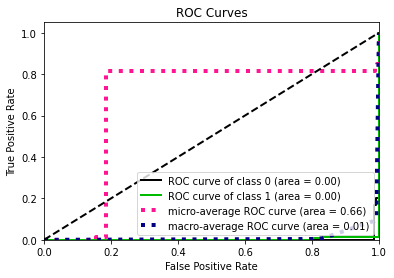

LOOCV score = 1.0
Accuracy score: 1.0


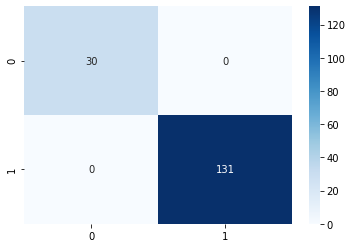

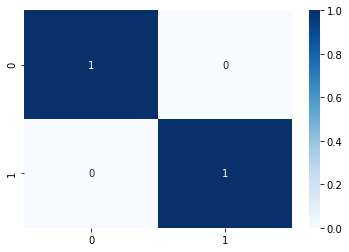

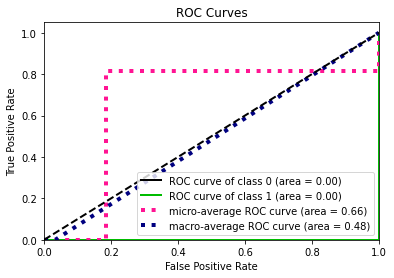

LOOCV score = 1.0
Accuracy score: 1.0


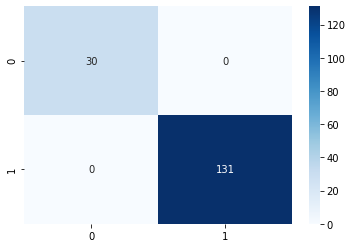

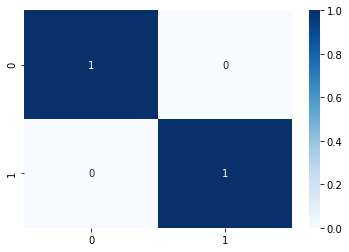

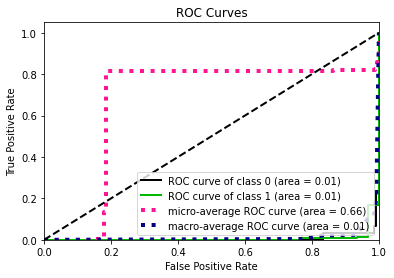

In [15]:
#2 classi SVM gridSearch Aw
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_2_s, y_2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_2_s, y_2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_2_s, y_2)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_2_s, y_2, False)

Accuracy: 0.727 (0.446)
Accuracy score: 0.7267080745341615


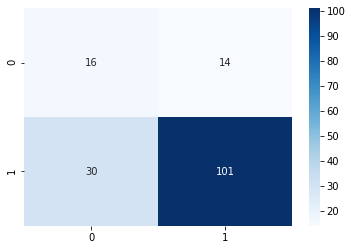

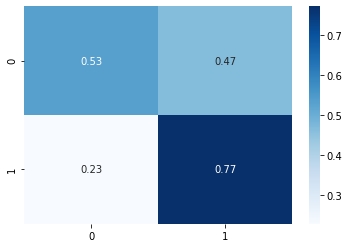

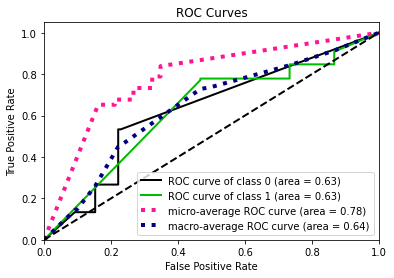

In [16]:
#2 classi decision - tree Aw
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(class_weight='balanced', random_state=0)
scores = cross_val_score(decision_t, X_2, y_2, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X_2, y_2, False)

In [17]:
result = pd.read_csv(os.path.join(root, 'miei_result.csv'), header=0, index_col=0)
X = result.to_numpy()
X_s = StandardScaler().fit_transform(X)
print(X.shape)
y = df.loc[result.index.values, 'DGN1'].to_numpy()
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)

(223, 18)
[1 1 2 2 0 2 2 2 2 1 1 1 1 1 0 1 0 0 1 1 1 2 1 1 2 1 1 2 1 0 2 2 2 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 2 1 2 2 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 2 1 2 1 1 1 0 1 0
 1 2 1 1 0 0 1 1 0 1 2 0 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1
 0 2 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1
 1 1 2 1 2 2 1 1 2 0 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1
 0]


Fitting 223 folds for each of 90 candidates, totalling 20070 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 6632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9828 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 12580 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 15500 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 16682 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 19888 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 20070 out of 20070 | elapsed:  6.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 223 folds for each of 30 candidates, totalling 6690 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1052 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 3052 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 5852 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6690 out of 6690 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 223 folds for each of 150 candidates, totalling 33450 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1044 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 3044 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 5844 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 9444 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 13844 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 19044 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 25044 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 31844 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 33450 out of 33450 | elapsed:  7.1min finished


LOOCV score = 0.6591928251121076
Accuracy score: 0.6591928251121076


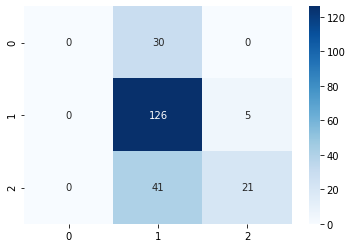

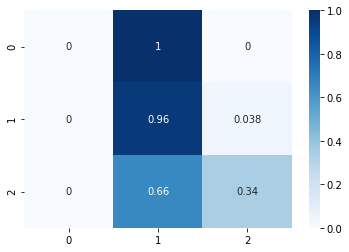

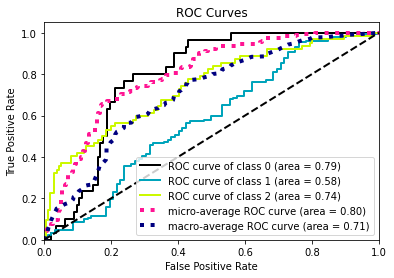

LOOCV score = 0.6412556053811659
Accuracy score: 0.6412556053811659


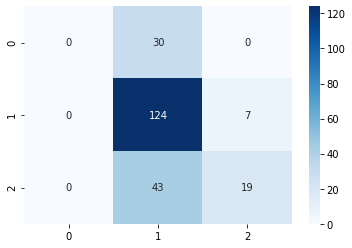

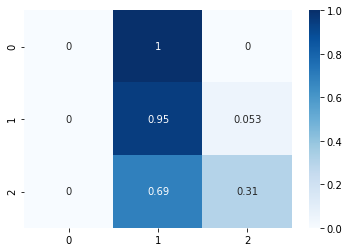

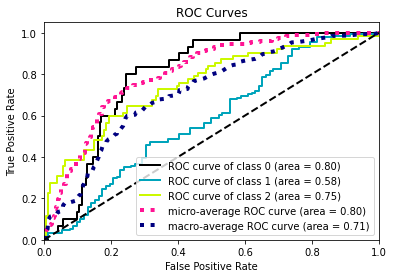

LOOCV score = 0.6547085201793722
Accuracy score: 0.6547085201793722


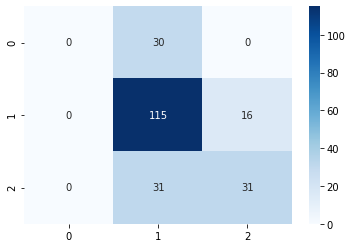

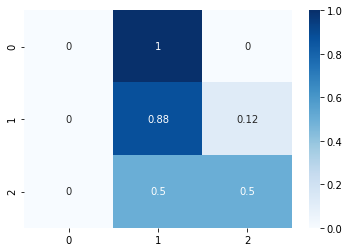

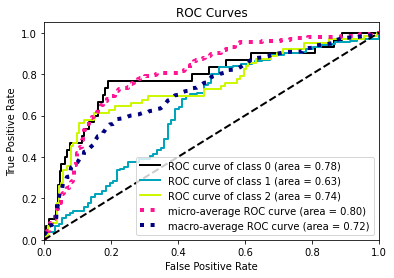

In [18]:
#3 classi SVM gridSearch C
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.484 (0.500)
Accuracy score: 0.484304932735426


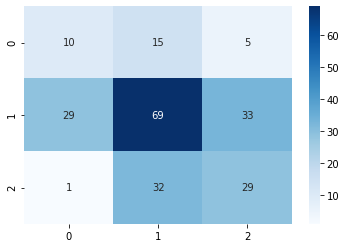

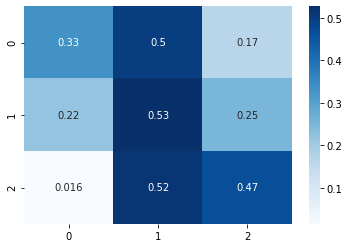

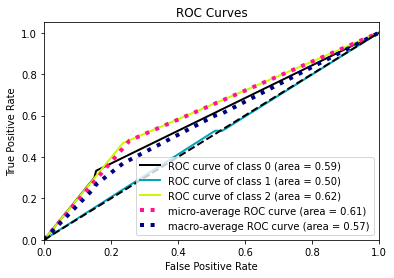

In [19]:
#3 classi decision - tree C
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

Fitting 223 folds for each of 90 candidates, totalling 20070 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 12984 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 15610 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 18166 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 20070 out of 20070 | elapsed:  7.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 223 folds for each of 30 candidates, totalling 6690 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6690 out of 6690 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 223 folds for each of 150 candidates, totalling 33450 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 7164 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 9764 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 12764 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 16596 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 24196 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 32596 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 33450 out of 33450 | elapsed: 10.8min finished


LOOCV score = 0.6367713004484304
Accuracy score: 0.6367713004484304


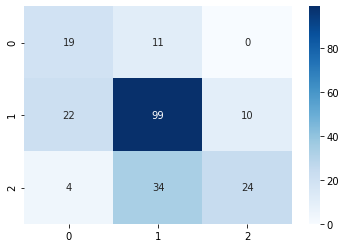

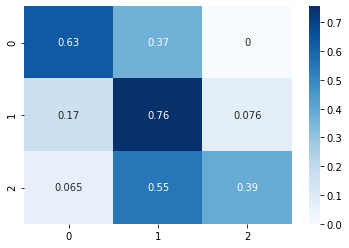

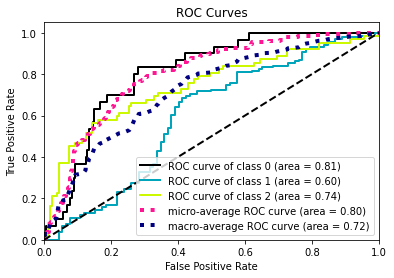

LOOCV score = 0.5829596412556054
Accuracy score: 0.5829596412556054


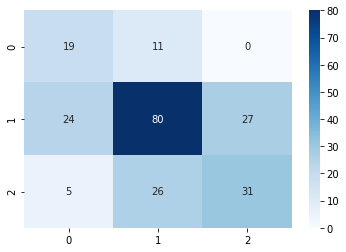

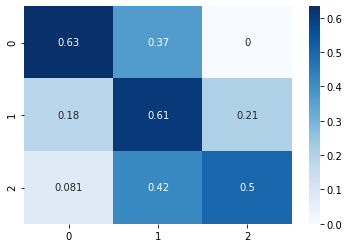

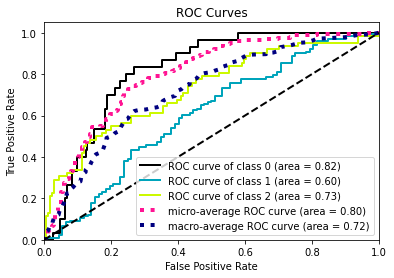

LOOCV score = 0.6053811659192825
Accuracy score: 0.6053811659192825


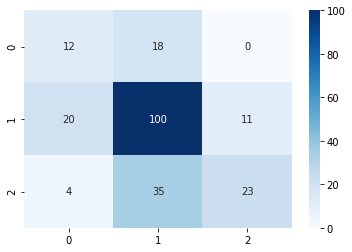

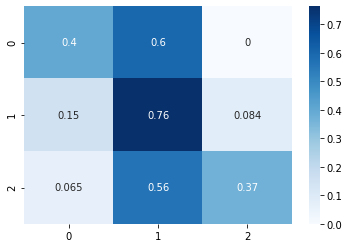

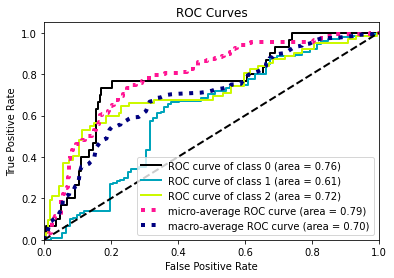

In [20]:
#3 classi SVM gridSearch Cw
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.538 (0.499)
Accuracy score: 0.5381165919282511


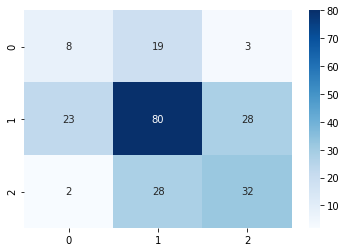

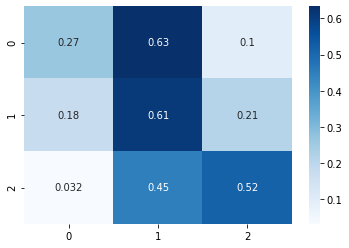

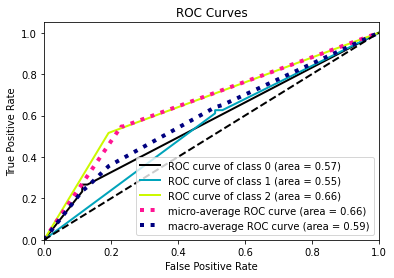

In [21]:
#3 classi decision - tree Cw
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(class_weight='balanced', random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

In [22]:
idx_2 = [y_3 != 2]
X_2 = X[idx_2]
X_2_s = StandardScaler().fit_transform(X_2)
y_2 = y_3[idx_2]
print(np.bincount(y_2))

[ 30 131]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 161 folds for each of 90 candidates, totalling 14490 fits


[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 10116 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 14490 out of 14490 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 161 folds for each of 30 candidates, totalling 4830 fits


[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 4804 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 4830 out of 4830 | elapsed:   32.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 161 folds for each of 150 candidates, totalling 24150 fits


[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 3612 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 11612 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 22812 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 24150 out of 24150 | elapsed:  1.7min finished


LOOCV score = 0.8198757763975155
Accuracy score: 0.8198757763975155


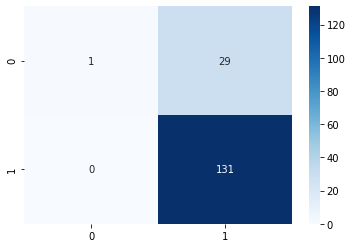

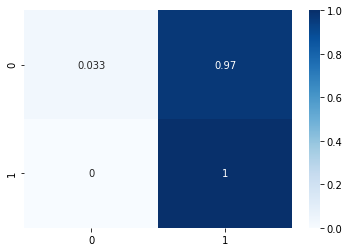

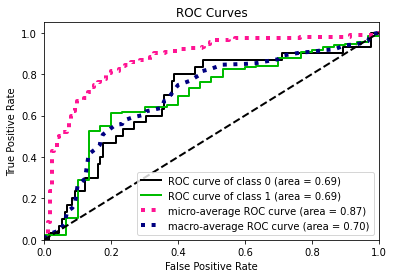

LOOCV score = 0.8136645962732919
Accuracy score: 0.8136645962732919


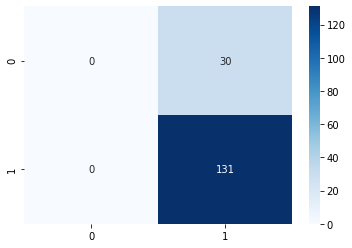

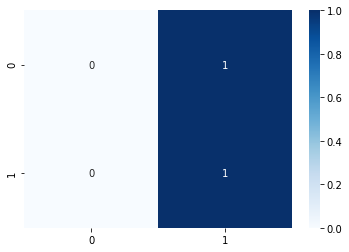

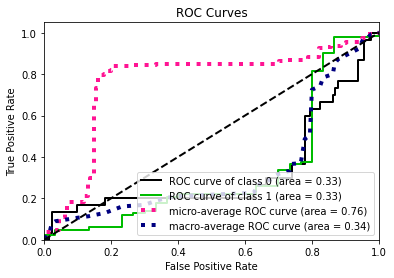

LOOCV score = 0.8571428571428571
Accuracy score: 0.8571428571428571


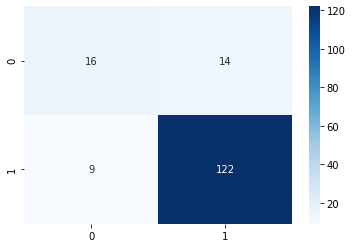

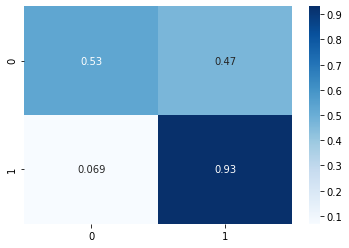

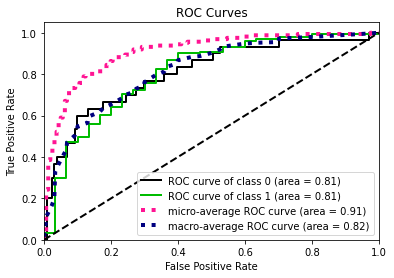

In [23]:
#2 classi SVM gridSearch C
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_2_s, y_2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_2_s, y_2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_2_s, y_2)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_2_s, y_2, False)

Accuracy: 0.714 (0.452)
Accuracy score: 0.7142857142857143


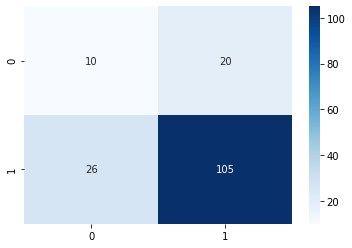

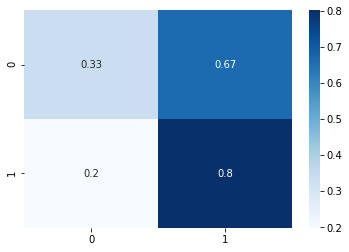

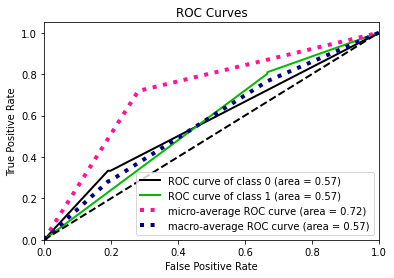

In [24]:
#2 classi decision - tree C
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X_2, y_2, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X_2, y_2, False)

Fitting 161 folds for each of 90 candidates, totalling 14490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 12596 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 14490 out of 14490 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 161 folds for each of 30 candidates, totalling 4830 fits


[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 4830 out of 4830 | elapsed:   34.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 161 folds for each of 150 candidates, totalling 24150 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 10860 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 19660 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 24150 out of 24150 | elapsed:  3.1min finished


LOOCV score = 1.0
Accuracy score: 1.0


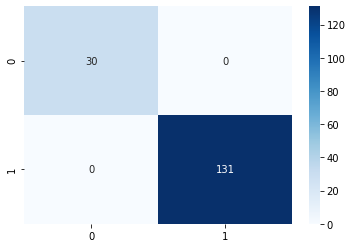

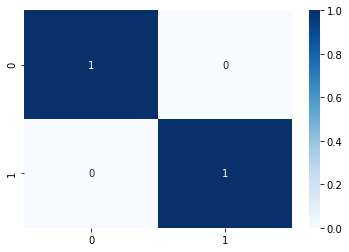

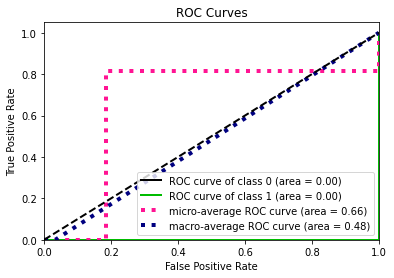

LOOCV score = 1.0
Accuracy score: 1.0


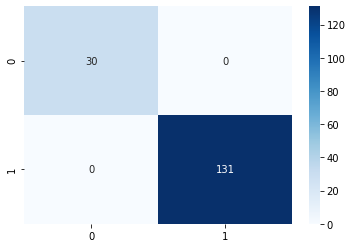

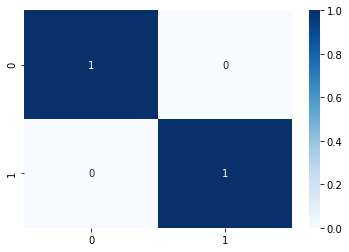

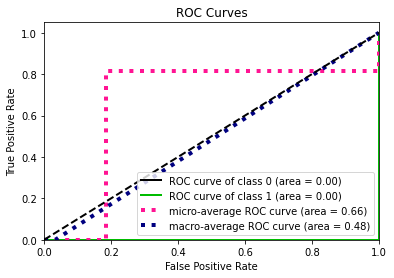

LOOCV score = 1.0
Accuracy score: 1.0


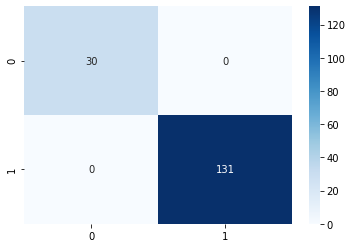

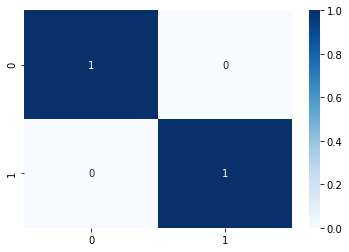

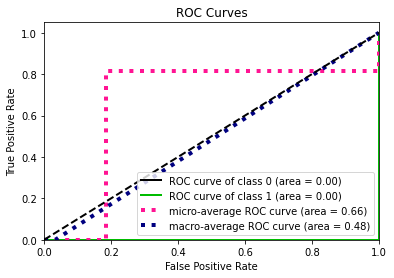

In [25]:
#2 classi SVM gridSearch Cw
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_2_s, y_2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_2_s, y_2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_2_s, y_2)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_2_s, y_2, False)

Accuracy: 0.720 (0.449)
Accuracy score: 0.7204968944099379


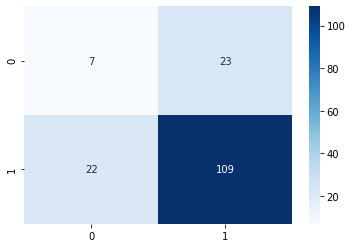

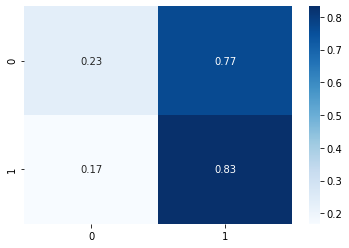

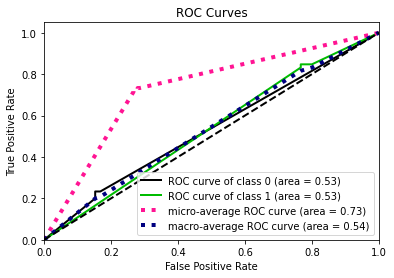

In [26]:
#2 classi decision - tree Cw
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(class_weight='balanced', random_state=0)
scores = cross_val_score(decision_t, X_2, y_2, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X_2, y_2, False)

[1 1 2 2 0 2 2 2 2 1 1 1 1 1 0 1 0 0 1 1 1 2 1 1 2 1 1 2 1 0 2 2 2 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 2 1 2 2 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 2 1 2 1 1 1 0 1 0
 1 2 1 1 0 0 1 1 0 1 2 0 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1
 0 2 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1
 1 1 2 1 2 2 1 1 2 0 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Fitting 386 folds for each of 90 candidates, totalling 34740 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 7164 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 9764 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 11856 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 15256 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 17256 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 21070 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 22376 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 24962 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 27590 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 29242 tas

Fitting 386 folds for each of 30 candidates, totalling 11580 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4972 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 7972 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 11372 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 11580 out of 11580 | elapsed:  7.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 386 folds for each of 150 candidates, totalling 57900 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 6388 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 9988 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 12088 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 14388 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 16888 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 19588 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 22488 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 26060 tasks      | elapse

LOOCV score = 0.7124352331606217
Accuracy score: 0.7124352331606217


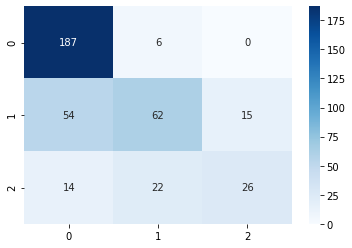

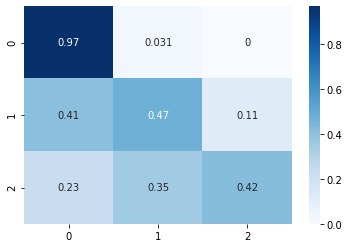

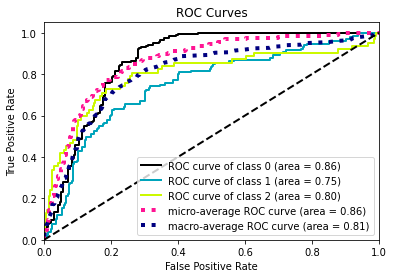

LOOCV score = 0.7072538860103627
Accuracy score: 0.7072538860103627


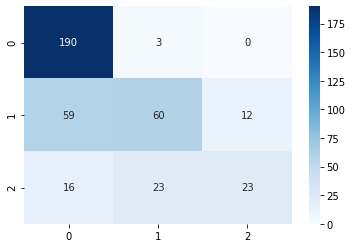

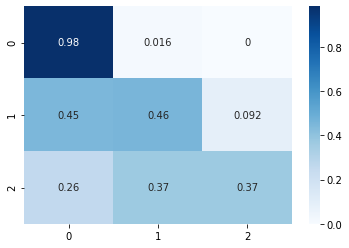

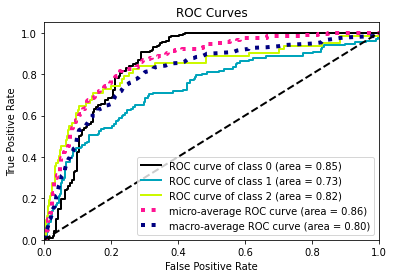

LOOCV score = 0.7020725388601037
Accuracy score: 0.7020725388601037


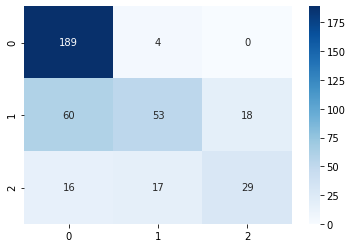

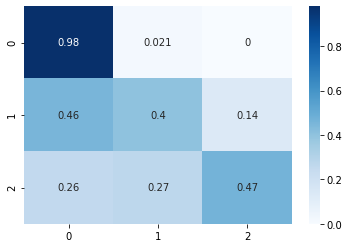

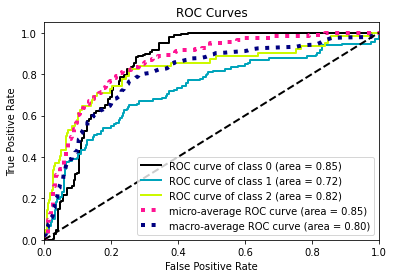

In [27]:
#3 classi SVM gridSearch Ab
df = pd.read_csv(os.path.join(root, 'bilanciato_abbate_3.csv'), header=0, index_col=0)
X = df.iloc[:, :-1].to_numpy()
X_s = StandardScaler().fit_transform(X)
y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.627 (0.484)
Accuracy score: 0.6269430051813472


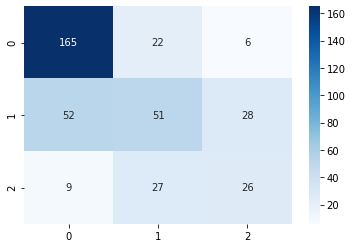

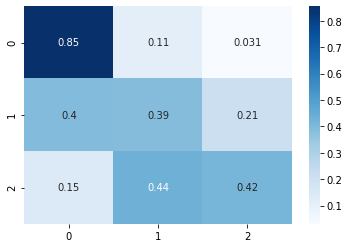

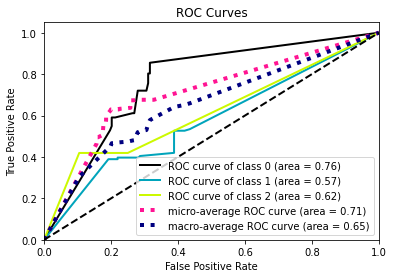

In [28]:
#3 classi decision - tree Ab
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

[1 1 2 2 0 2 2 2 2 1 1 1 1 1 0 1 0 0 1 1 1 2 1 1 2 1 1 2 1 0 2 2 2 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 2 1 2 2 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 2 1 2 1 1 1 0 1 0
 1 2 1 1 0 0 1 1 0 1 2 0 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1
 0 2 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1
 1 1 2 1 2 2 1 1 2 0 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Fitting 262 folds for each of 90 candidates, totalling 23580 fits


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 7532 t

Fitting 262 folds for each of 30 candidates, totalling 7860 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 7860 out of 7860 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 262 folds for each of 150 candidates, totalling 39300 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 7164 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 9764 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 12764 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 17852 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 25452 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 33852 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 39300 out of 39300 | elapsed: 11.2min finished


LOOCV score = 0.7709923664122137
Accuracy score: 0.7709923664122137


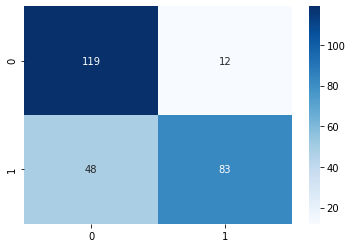

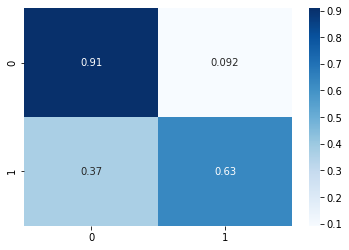

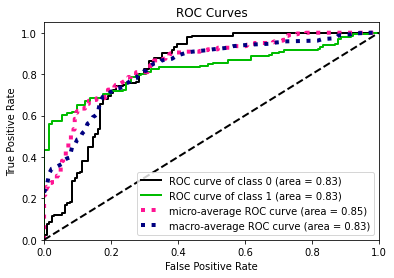

LOOCV score = 0.7633587786259542
Accuracy score: 0.7633587786259542


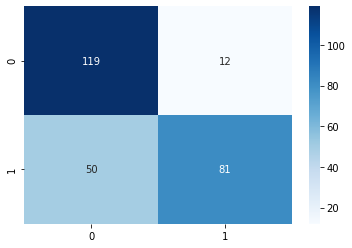

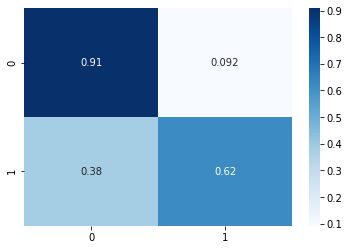

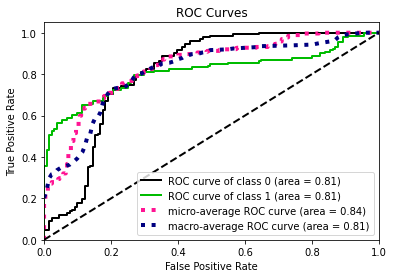

LOOCV score = 0.7900763358778626
Accuracy score: 0.7900763358778626


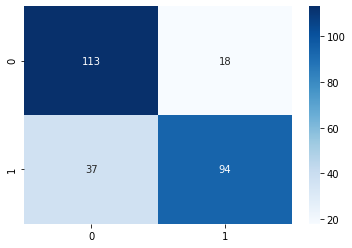

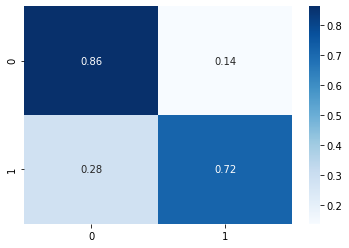

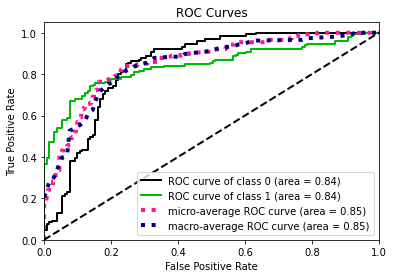

In [29]:
#2 classi SVM gridSearch Ab

df = pd.read_csv(os.path.join(root, 'bilanciato_abbate_2.csv'), header=0, index_col=0)
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)
idx_2 = [y_3 != 2]
X_2 = X[idx_2]
X_2_s = StandardScaler().fit_transform(X_2)
y_2 = y_3[idx_2]

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_2_s, y_2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_2_s, y_2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_2_s, y_2)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_2_s, y_2, False)

Accuracy: 0.740 (0.438)
Accuracy score: 0.7404580152671756


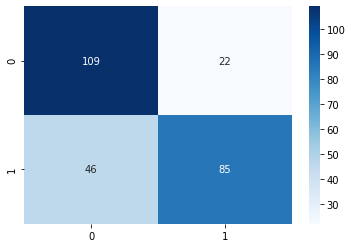

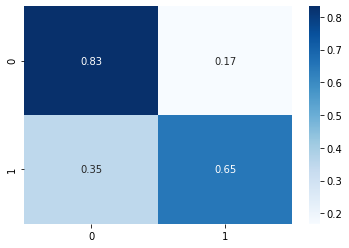

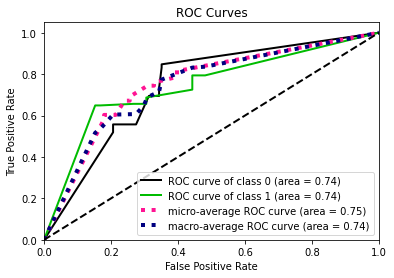

In [30]:
#2 classi decision - tree Ab
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X_2, y_2, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X_2, y_2, False)

[1 1 2 2 0 2 2 2 2 1 1 1 1 1 0 1 0 0 1 1 1 2 1 1 2 1 1 2 1 0 2 2 2 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 2 1 2 2 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 2 1 2 1 1 1 0 1 0
 1 2 1 1 0 0 1 1 0 1 2 0 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1
 0 2 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1
 1 1 2 1 2 2 1 1 2 0 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Fitting 386 folds for each of 90 candidates, totalling 34740 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 7164 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 9764 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 12764 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 16164 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 17766 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 21966 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 23164 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 27034 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 28384 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 32442 tas

Fitting 386 folds for each of 30 candidates, totalling 11580 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 6388 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 8844 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 11168 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11580 out of 11580 | elapsed:  8.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 386 folds for each of 150 candidates, totalling 57900 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 6388 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 9988 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 12088 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 14388 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 16888 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 19588 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 22488 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 26024 tasks      | elapse

LOOCV score = 0.7253886010362695
Accuracy score: 0.7253886010362695


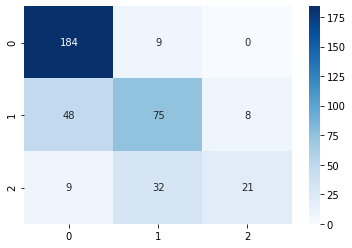

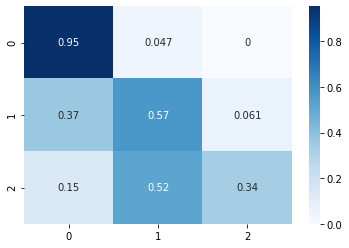

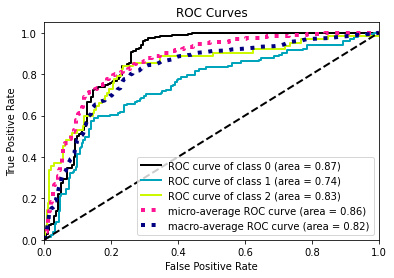

LOOCV score = 0.7305699481865285
Accuracy score: 0.7305699481865285


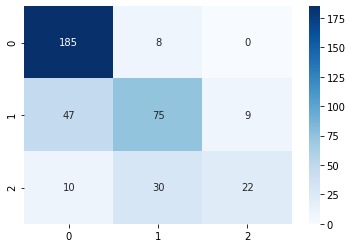

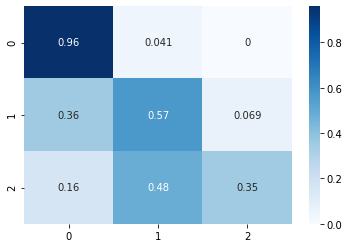

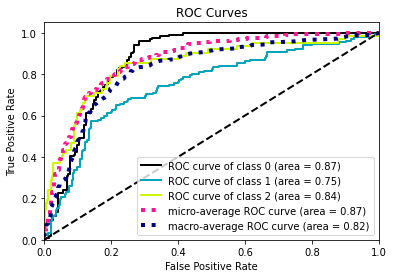

LOOCV score = 0.7176165803108808
Accuracy score: 0.7176165803108808


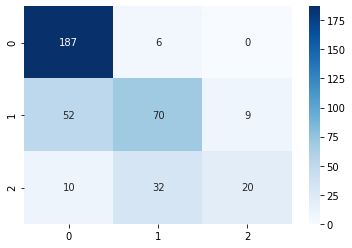

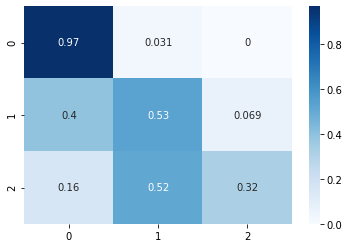

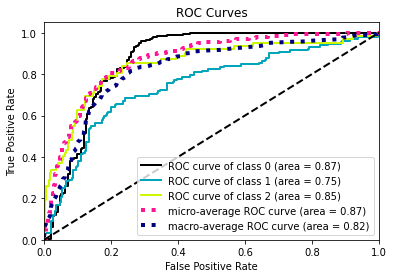

In [31]:
#3 classi SVM gridSearch Cb
df = pd.read_csv(os.path.join(root, 'bilanciato_miei_3.csv'), header=0, index_col=0)
X = df.iloc[:, :-1].to_numpy()
X_s = StandardScaler().fit_transform(X)
y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.614 (0.487)
Accuracy score: 0.6139896373056994


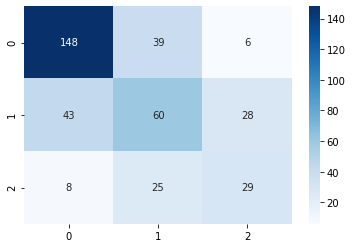

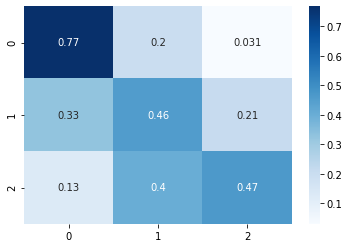

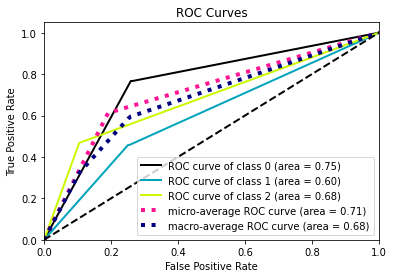

In [32]:
#3 classi decision - tree Cb
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

[1 1 2 2 0 2 2 2 2 1 1 1 1 1 0 1 0 0 1 1 1 2 1 1 2 1 1 2 1 0 2 2 2 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 2 1 2 2 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 2 1 2 1 1 1 0 1 0
 1 2 1 1 0 0 1 1 0 1 2 0 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1
 0 2 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1
 1 1 2 1 2 2 1 1 2 0 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Fitting 262 folds for each of 90 candidates, totalling 23580 fits


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 2956 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 6956 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 11454 

Fitting 262 folds for each of 30 candidates, totalling 7860 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 7860 out of 7860 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 262 folds for each of 150 candidates, totalling 39300 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 7164 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 9764 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 12764 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 17860 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 25460 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 33860 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 39300 out of 39300 | elapsed: 11.2min finished


LOOCV score = 0.7977099236641222
Accuracy score: 0.7977099236641222


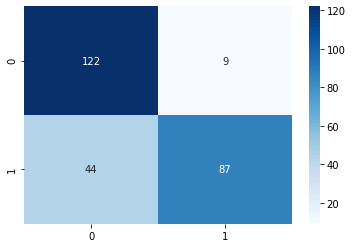

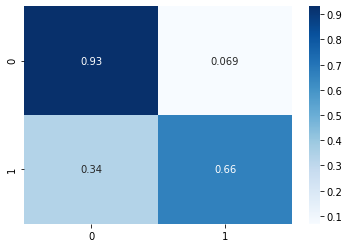

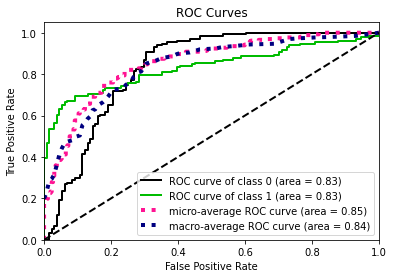

LOOCV score = 0.8053435114503816
Accuracy score: 0.8053435114503816


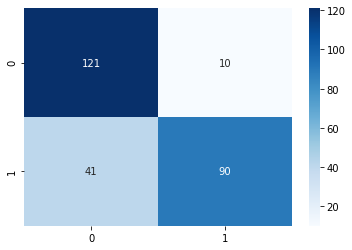

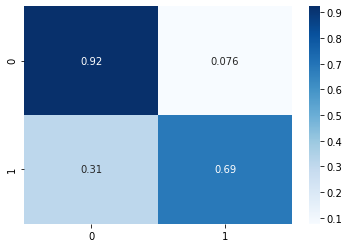

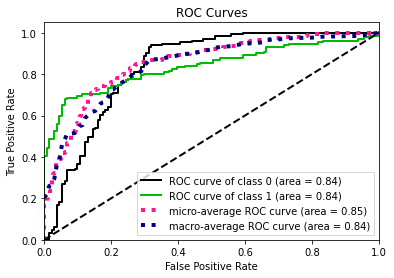

LOOCV score = 0.851145038167939
Accuracy score: 0.851145038167939


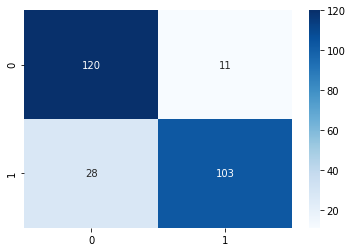

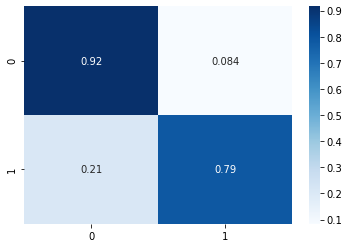

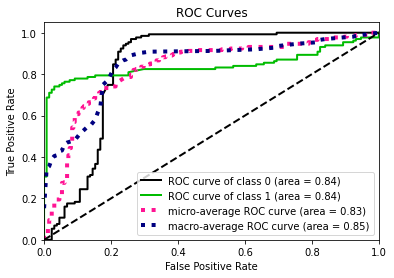

In [33]:
#2 classi SVM gridSearch Cb

df = pd.read_csv(os.path.join(root, 'bilanciato_miei_2.csv'), header=0, index_col=0)
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)
idx_2 = [y_3 != 2]
X_2 = X[idx_2]
X_2_s = StandardScaler().fit_transform(X_2)
y_2 = y_3[idx_2]

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_2_s, y_2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_2_s, y_2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_2_s, y_2)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_2_s, y_2, False)

Accuracy: 0.740 (0.438)
Accuracy score: 0.7404580152671756


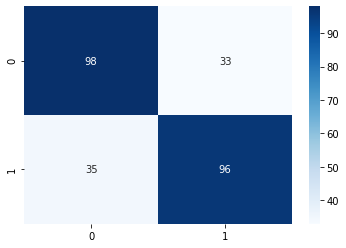

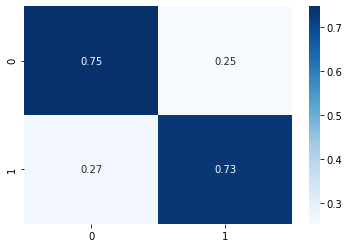

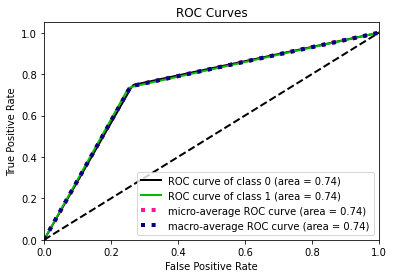

In [34]:
#2 classi decision - tree Cb
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X_2, y_2, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X_2, y_2, False)